In [1]:
import matplotlib.pyplot as plt

20
(192, 192, 208)


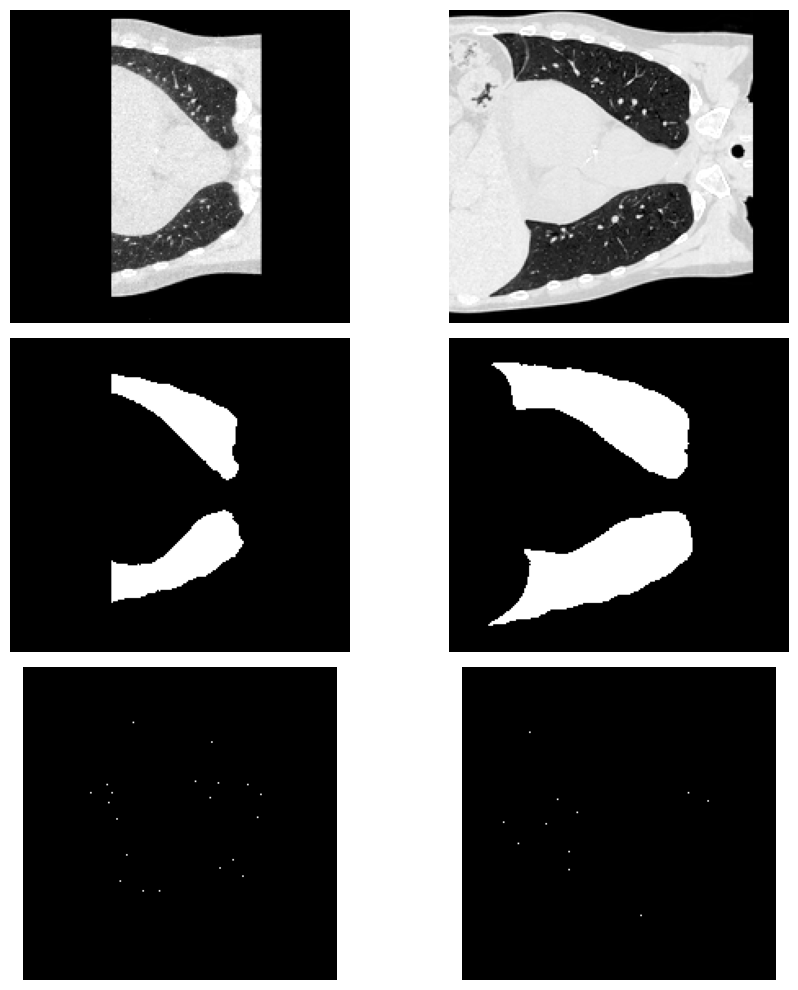

{'img1': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'itk::simple::Image *' at 0x14b2ea38fa20> >, 'img2': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'itk::simple::Image *' at 0x14b2d74170c0> >, 'voxel1': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  .

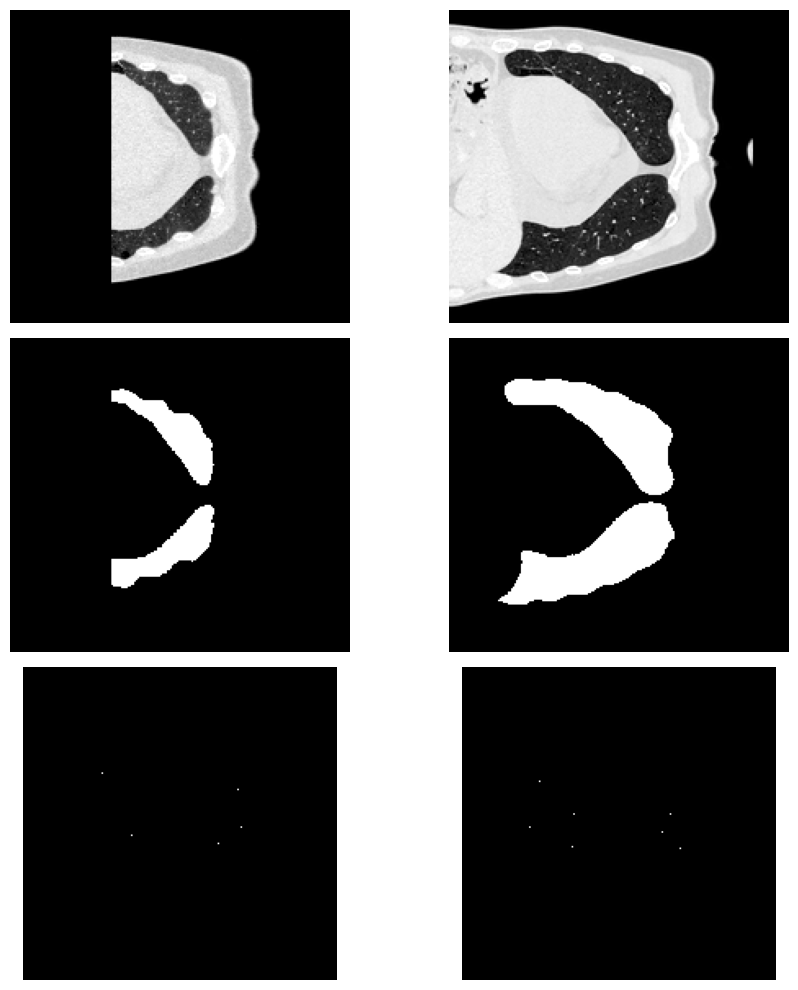

In [2]:
import sys 
sys.path.append('..')
from data_util.dataset import Data
from tools.utils         import show_img
from tools.visualization import plot_sample_data

import matplotlib.pyplot as plt
#if __name__  == 'main':
data_file = '/home/cerquinl/projects/raw_data/LungCT/LungCT_dataset.json'
root_dir  = '/home/cerquinl/projects/raw_data/LungCT/'


data      = Data(data_file, root_dir=root_dir, mode='train')
sample_id = 0
sample    = data[sample_id]
print(len(data))
plot_sample_data(sample, slide=150)

In [3]:
from tools.utils import convert_tensor_to_numpy
from metrics.losses import compute_TRE
moving_kps = sample['kps1'][:,:]
fixed_kps  = sample['kps2'][:,:]
fixed_img  = sample['img1']
moving_img = sample['img2']
print(type(moving_kps), type(fixed_kps), type(moving_img))
moving_kps = convert_tensor_to_numpy(moving_kps)
fixed_kps  = convert_tensor_to_numpy(fixed_kps)
print(type(moving_kps), type(fixed_kps), type(moving_img))
print('Image Spacing',compute_TRE(moving_kps, fixed_kps, moving_img.GetSpacing()))
print('Spacing [1.75, 1.25, 1.75]', compute_TRE(moving_kps, fixed_kps, [1.75, 1.25, 1.75]))
print('Spacing [1, 1, 1]', compute_TRE(moving_kps, fixed_kps, [1., 1., 1.]))

<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'SimpleITK.SimpleITK.Image'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'SimpleITK.SimpleITK.Image'>
Image Spacing (20.05391491731027, 7.897901771320782)
Spacing [1.75, 1.25, 1.75] (20.05391491731027, 7.897901771320782)
Spacing [1, 1, 1] (14.415242826591285, 5.741956391904727)


moving_l.max() 1762.0
fixed_l.max() 1350.0


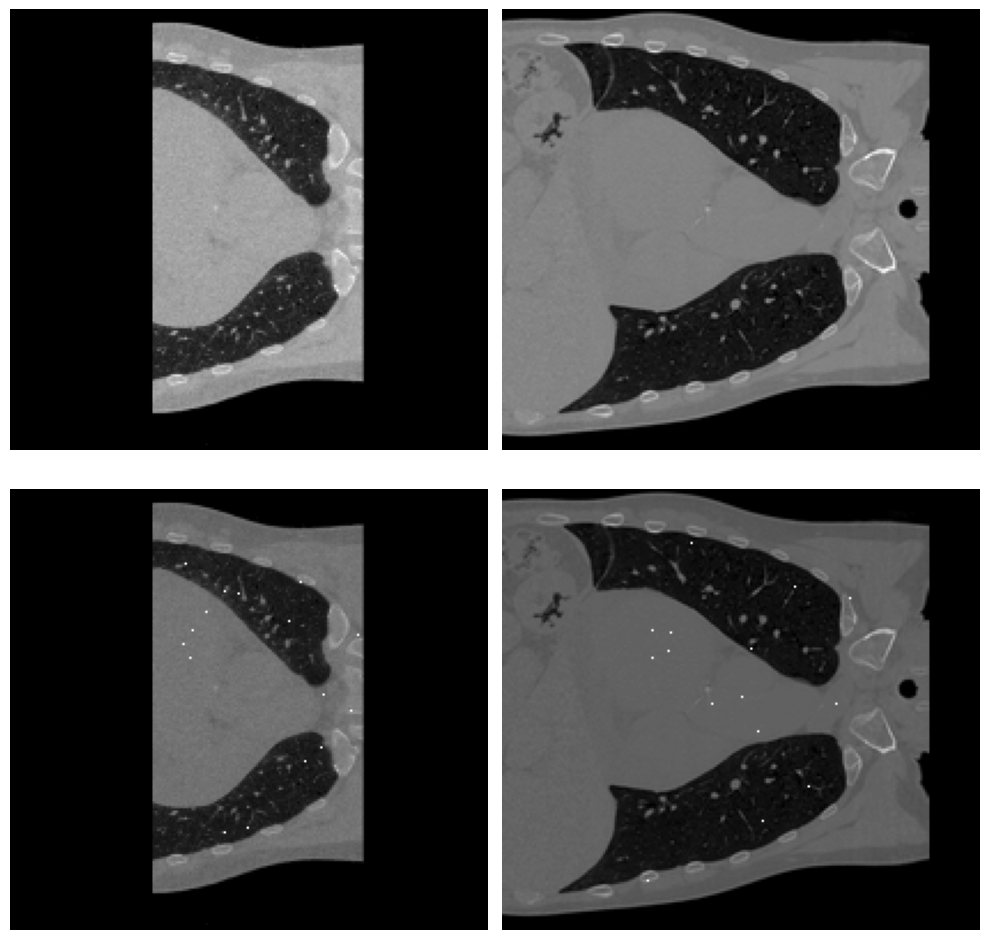

In [4]:
import SimpleITK as sitk
from tools.utils import convert_itk_to_nda

#fixed_img  = sample['voxel1']
#moving_img = sample['voxel2']
#fixed_image_a  = to_numpy(fixed_img)
#moving_image_a  = to_numpy(moving_img)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))


# sitk -> xyz
# numpy -> zyx
moving_image_a = convert_itk_to_nda(moving_img)#sitk.GetArrayFromImage(moving_img).T
fixed_image_a  = convert_itk_to_nda(fixed_img)#sitk.GetArrayFromImage(fixed_img).T

moving_l = moving_image_a.copy()
fixed_l  = fixed_image_a.copy()

# moving_l[moving_kps] = moving_l.max()
# fixed_l[fixed_kps] = fixed_l.max()

for p in fixed_kps:
    moving_l[p[0], p[1], p[2]] = moving_l.max()

print('moving_l.max()', moving_l.max())
for p in moving_kps:
    fixed_l[p[0], p[1], p[2]] = fixed_l.max()
print('fixed_l.max()', fixed_l.max())

s = 128
axs[0,0].imshow(fixed_image_a[s, :, :], cmap='gray')
axs[0,0].axis('off')
axs[0, 1].imshow(moving_image_a[s, :, :], cmap='gray')
axs[0,1].axis('off')
axs[1,0].imshow(fixed_l[s, :, :], cmap='gray')
axs[1,0].axis('off')
axs[1,1].imshow(moving_l[s, :, :], cmap='gray')
axs[1,1].axis('off')
plt.tight_layout()
plt.show()

moving_l.max() 1.0
fixed_l.max() 1.0


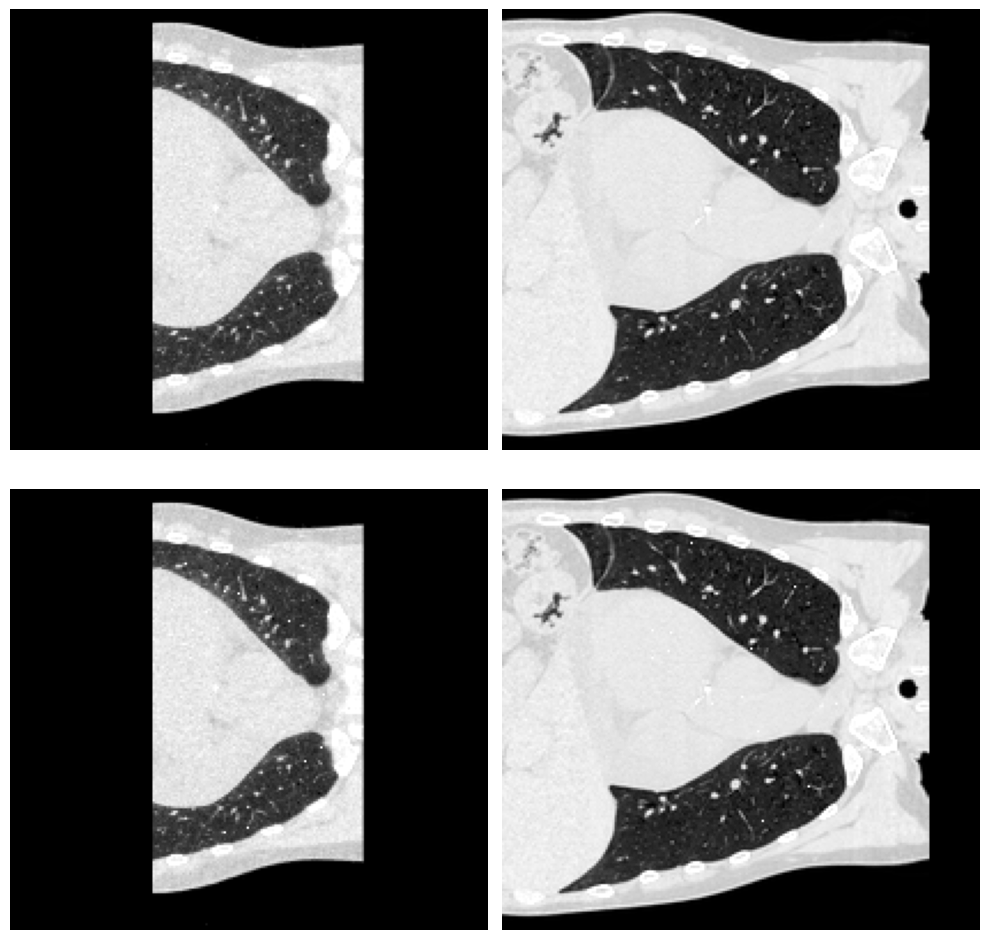

In [5]:
from tools.utils import convert_nda_to_itk
fixed_img_ct  = sample['img1']
moving_img_ct = sample['img2']
fixed_img  = sample['voxel1']
moving_img = sample['voxel2']
fixed_image_a  = convert_itk_to_nda(convert_nda_to_itk(convert_tensor_to_numpy(fixed_img), fixed_img_ct))
moving_image_a  = convert_itk_to_nda(convert_nda_to_itk(convert_tensor_to_numpy(moving_img), moving_img_ct))

fig, axs = plt.subplots(2, 2, figsize=(10, 10))


# sitk -> xyz
# numpy -> zyx
#moving_image_a = sitk.GetArrayFromImage(moving_img).T
#fixed_image_a  = sitk.GetArrayFromImage(fixed_img).T

moving_l = moving_image_a.copy()
fixed_l  = fixed_image_a.copy()

# moving_l[moving_kps] = moving_l.max()
# fixed_l[fixed_kps] = fixed_l.max()

for p in fixed_kps:
    moving_l[p[0], p[1], p[2]] = moving_l.max()

print('moving_l.max()', moving_l.max())
for p in moving_kps:
    fixed_l[p[0], p[1], p[2]] = fixed_l.max()
print('fixed_l.max()', fixed_l.max())

s = 128
axs[0,0].imshow(fixed_image_a[s, :, :], cmap='gray')
axs[0,0].axis('off')
axs[0, 1].imshow(moving_image_a[s, :, :], cmap='gray')
axs[0,1].axis('off')
axs[1,0].imshow(fixed_l[s, :, :], cmap='gray')
axs[1,0].axis('off')
axs[1,1].imshow(moving_l[s, :, :], cmap='gray')
axs[1,1].axis('off')
plt.tight_layout()
plt.show()